# Домашняя работа №1 - Метод наименьших квадратов 
**Студент:** Балакирева Дарья,
    **Группа:** НПМбд-01-19 б

**Задача:** приблизить заданную функцию $f(x)$ многочленом вида $w_{0} + w_{1}x + w_{2}x^{2} + ... + w_{n-1}x^{n-1}$, реализовав три метода: *полиномиальная регрессия, полиномиальная регрессия с зашумленными данными, метод наименьших квадратов*. В качестве функции $f(x)$ предлагают взять функцию $f(x) = sin(\frac{x}{5})e^{\frac{x}{10}} + 5e^{-\frac{1}{2}x}$ на отрезке $[1;15]$, однако можно задать и любую другую непрерывную функцию.

Импортируем все библиотеки, которые нужны

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd

In [27]:
def f(xx):
    return (np.sin(xx / 5) * (np.exp(xx / 10)) + 5 * np.exp(-0.5 * xx))
xx = np.linspace(1, 15, 5)
yy = f(xx)
def comp_pol_coef(xx, yy):
    n = len(xx)
    b = yy
    A = np.zeros((n,n))
    for i in range(n):
        A[:,i] = xx ** i
    return np.linalg.solve(A, b)
def polynome(w, x):
    s = 0
    for i in range(len(w)):
        s += w[i] * (x ** i)
    return s

Сначала сделаем для 5 точек

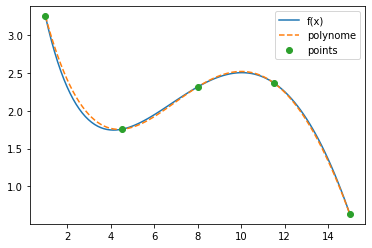

In [25]:
n = 5
w = comp_pol_coef(xx,yy)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label = 'f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label = 'polynome')
plt.plot(x_points, y_points, 'o', label = 'points')
plt.legend()
plt.show()

Теперь для 15

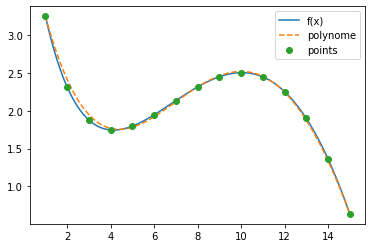

In [28]:
n = 15
w = comp_pol_coef(xx,yy)
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label = 'f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label = 'polynome')
plt.plot(x_points, y_points, 'o', label = 'points')
plt.legend()
plt.show()

Видно, что с увеличением числа опорных точек, увеличивается и точность аппроксимации функции полиномом

## Полиномиальная регрессия с зашумленными данными </font>
Рассмотрим случай, когда значение функции $f$ известно с некоторой неточностью. Для этого  добавим  к  значениям  функции $f(x)$  случайный  шум, сгенерированный по гауссовскому распеределению с нулевым средним и стандартным отклонением $\sigma=0.01$.
Для этого изменим функцию, которая находит коэффициенты полинома.Начнем с 15 опорных точек

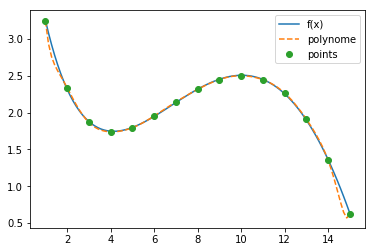

In [97]:
n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = comp_pol_coef(x_points, y_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label = 'f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label = 'polynome')
plt.plot(x_points, y_points, 'o', label = 'points')
plt.legend()
plt.show()

и 5 опорными точками

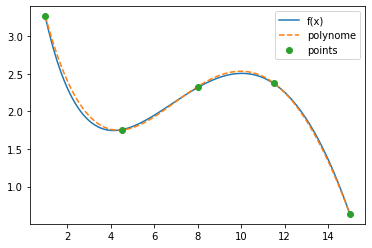

In [30]:
n = 5
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = comp_pol_coef(x_points, y_points)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label = 'f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label = 'polynome')
plt.plot(x_points, y_points, 'o', label = 'points')
plt.legend()
plt.show()

Видно,что при использовании шума в данных с ростом числа опорных точек точность аппроксимации падает. Однако все же точек должно быть не менее 3х.

## Метод наименьших квадратов</font>
#### Для реализации данного подхода будет использоваться псевдо-обратная матрица Мура-Пенроуза: $Ax = b => x = A^{+}b = (A^{T}A)^{-1}A^{T}b$. </font>
Добавим функцию, которая будет находить псевдо-обратную матрицу Мура-Пенроуза, и немного изменим функцию, находящую коэффициенты полинома.

In [154]:
def method_naim_kvadratov(xx, yy):
  
    n = len(xx)
    b = yy
    A = np.ones([n, 6])
    for i in range(1, 6):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

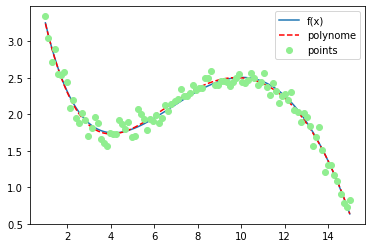

In [157]:
n = 100
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = method_naim_kvadratov(x_points, y_points)

plt.plot(x_points, f(x_points), label='f(x)')
plt.plot(x_points, polynome(w, x_points), '--', label='polynome', color = 'red')
plt.plot(x_points, y_points, 'o', label='points', color = 'lightgreen')
plt.legend()
plt.show()

В итоге получаем достаточно хорошее приближение, несмотря на большой шум в исходных данных.